
# Diseño de software para cómputo científico

----

## Unidad 2: Testing


### Agenda de la Unidad 2
---

**Clase 1**
    
    - Calidad de software.
    - Principios de diseño: DRY y KISS 
    - Refactoreo.

**Clase 2**
    
    - Depuración de código.
    - Pruebas unitarias y funcionales con pytest.
    - Testing basados en propiedades (Hypothesis).

**Clase 3**

    - Cobertura de código (codecov).
    - Perfilado de código


## Pytest

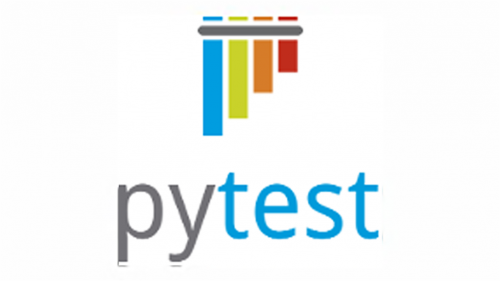

In [2]:
!pip install pytest

You should consider upgrading via the 'pip install --upgrade pip' command.


## Pytest Básico

In [3]:
# content of test_sample.py
def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5

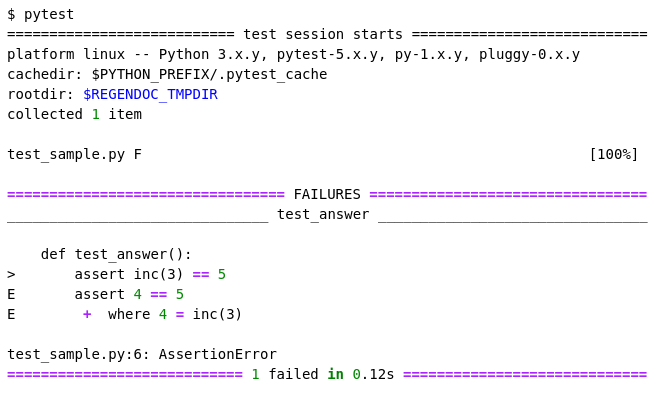

## Esperando errores

In [14]:
# content of test_sysexit.py
import pytest

def f():
    raise SystemExit(1)

def test_mytest():
    with pytest.raises(SystemExit):
        f()

## Test Case

In [ ]:
class TestClass:
    
    def test_one(self):
        x = "this"  
        assert 'h' in x

    def test_two(self):
         x = "hello"
        assert hasattr(x, 'check')
        

## Como correr tests

- py.test tests/test_mod.py
- py.test tests/
- py.test -k match **# def test_match():**
- py.test -x **# stop on first failure case**
- py.test --maxfail=2 **# on the second**
- py.test -s **# enable `print` output**
- py.test --durations=10 **# list top10 slowest cases**



## Qué es lo que se testea?

- folder, file.	
- recursive	
- test_xxx.py, xxx_test.py	
- TestClass (without __init__ method)	
- all the function or method with prefix `test_`


## Fixtures

In [15]:
import numpy as np

import pytest


@pytest.fixture
def normal():
    return np.random.normal(10, 2, 100)


class TestCaseNormal:

    def test_mean(self, normal):
        assert normal.mean() == 10

    def test_std(self, normal):
        assert normal.std() == 10

## Fixtures

In [16]:
import numpy as np

import pytest


@pytest.fixture
def normal():
    return np.random.normal(10, 2, 100)


class TestCaseNormal:

    def test_mean(self, normal):
        np.testing.assert_almost_equal(normal.mean(), 10., 0)

    def test_std(self, normal):
        np.testing.assert_almost_equal(normal.std(), 2., 0)

## Fixtures

In [ ]:
import numpy as np

import pytest

class TestCaseNormal:

    @pytest.fixture
    def normal(self):
        return np.random.normal(10, 2, 100)

    def test_mean(self, normal):
        np.testing.assert_almost_equal(normal.mean(), 10., 0)

    def test_std(self, normal):
        np.testing.assert_almost_equal(normal.std(), 2., 0)

## Fixtures a la `xUnit`

In [17]:
class TestCaseUniform:

    def setup_method(self, method):
        self.uniform = np.random.uniform(10, 20, 100)

    def teardown_method(self, method):
        print("Finishing")

    def test_min(self):
        assert self.uniform.min() >= 10

    def test_max(self):
        assert self.uniform.min() <= 20



## Fixtures a la `xUnit`

- `setup_module` / `teardown_module`	
- `setup_class` / `teardown_class`
- `setup_method` / `teardown_method`	
- `setup_function` / `teardown_function`


## Markers

- Skip and xfail: Para tests que no pueden funcionar
- SkipIf: Para los que no funcionan en ciertas condiciones

In [18]:
@pytest.mark.skip(reason="no way of currently testing this")
def test_the_unknown():
    ...

In [19]:
import sys


@pytest.mark.skipif(sys.version_info < (3, 6), reason="requires python3.6 or higher")
def test_function():
    ...

In [20]:
@pytest.mark.skipif(sys.platform == "win32", reason="does not run on windows")
class TestPosixCalls:
    def test_function(self):
        "will not be setup or run under 'win32' platform"

In [21]:
@pytest.mark.xfail
def test_function():
    ...